In [3]:
# Cell loads the data

from dataset_loader import data_loader, get_descriptors, one_filter, data_scaler
import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
from sklearn import preprocessing
# file name and data path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
base_path = os.getcwd()
file_name = 'data/CrystGrowthDesign_SI.csv'

"""
Data description.

    Descriptors:
        'void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest'
    Source task:
        'H2@100 bar/243K (wt%)'
    Target tasks:
        'H2@100 bar/130K (wt%)' 'CH4@100 bar/298 K (mg/g)' '5 bar Xe mol/kg' '5 bar Kr mol/kg'
"""

descriptor_columns = ['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']
one_filter_columns = ['H2@100 bar/243K (wt%)'] 
another_filter_columns = ['H2@100 bar/130K (wt%)'] 

# load data
data = data_loader(base_path, file_name)

# extract descriptors and gas adsorptions
one_property = one_filter(data, one_filter_columns)
descriptors = get_descriptors(data, descriptor_columns)

# prepare training inputs and outputs
X = np.array(descriptors.values, dtype=np.float32)
y = np.array(one_property.values, dtype=np.float32).reshape(len(X), )
X = data_scaler(X)
y = data_scaler(y.reshape(-1, 1)).reshape(len(X),)
# removes catagorical varaiables
test=data.drop(["MOF ID","topology","First nodular character","Second nodular character"],axis=1)
#g_comp=5
# all vs just used !!!! uncomment below for just feature used anaylsis
g_comp=5
test=test[['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']]
g=preprocessing.StandardScaler().fit_transform(test)
g=pd.DataFrame(g)
g.columns=test.columns
test=g

2


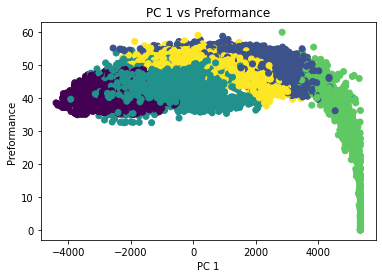

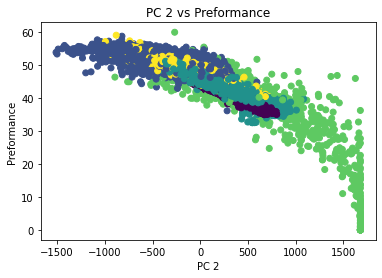

NameError: name 'average_val' is not defined

In [17]:
# made my own helper functions 
# just plots pca 1,2 with how ever many gausian clusters on test data
from Statistics_helper import make_pca_gausian_fit
var=.9
g_comp=5
pc1,pc2,color=make_pca_gausian_fit(1,test,var,g_comp,array_out=True)
# run anaylsis of PC vs preformance of absorbtion based on cluster found above
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.show()
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
# Notice that the clusters are verticle..
# mean cluster analysis (colors do not match above yet)
ave_by_c=average_val.groupby(by="Cluster").mean()
plt.title("PC 2 vs Preformance (by cluster mean)")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(ave_by_c["PC1"],ave_by_c["H2@100 bar/77K (g/L)"])
plt.show()
plt.title("PC 2 vs Preformance (by cluster mean)")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(ave_by_c["PC2"],ave_by_c["H2@100 bar/77K (g/L)"])

3

In [21]:
# Cell loads the data
from dataset_loader import data_loader, get_descriptors, one_filter, data_scaler
import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
# file name and data path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
base_path = os.getcwd()
file_name = 'data/CrystGrowthDesign_SI.csv'
"""
Data description.

    Descriptors:
        'void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest'
    Source task:
        'H2@100 bar/243K (wt%)'
    Target tasks:
        'H2@100 bar/130K (wt%)' 'CH4@100 bar/298 K (mg/g)' '5 bar Xe mol/kg' '5 bar Kr mol/kg'
"""

descriptor_columns = ['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']
one_filter_columns = ['H2@100 bar/243K (wt%)'] 
another_filter_columns = ['H2@100 bar/130K (wt%)'] 

# load data
data = data_loader(base_path, file_name)

# extract descriptors and gas adsorptions
one_property = one_filter(data, one_filter_columns)
descriptors = get_descriptors(data, descriptor_columns)

# prepare training inputs and outputs
X = np.array(descriptors.values, dtype=np.float32)
y = np.array(one_property.values, dtype=np.float32).reshape(len(X), )
X = data_scaler(X)
y = data_scaler(y.reshape(-1, 1)).reshape(len(X),)
# removes catagorical varaiables
test=data.drop(["MOF ID","topology","First nodular character","Second nodular character"],axis=1)
# all vs just used !!!! uncomment below for just feature used anaylsis
g_comp=6
test=test[['void fraction', 'Vol. S.A.', 'Grav. S.A.', 'Pore diameter Limiting', 'Pore diameter Largest']]
g=preprocessing.StandardScaler().fit_transform(test)
g=pd.DataFrame(g)
g.columns=test.columns
test=g

In [22]:
# made my own helper functions 
# just plots pca 1,2 with how ever many gausian clusters on test data
from Statistics_helper import make_pca_agg_fit
from sklearn.cluster import AgglomerativeClustering
var=.9
_,_,color=make_pca_agg_fit(1,test,var,g_comp,array_out=True)

# Notice that the clusters are verticle..

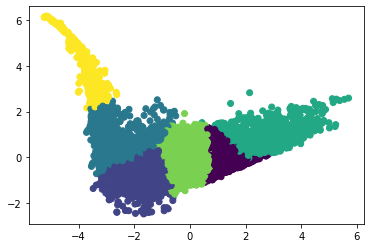

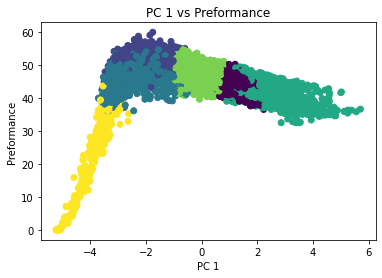

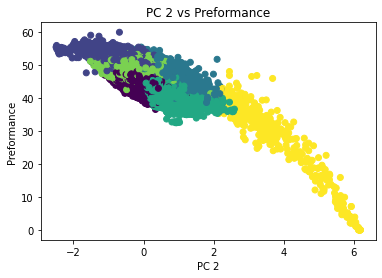

In [23]:
# run anaylsis of PC vs preformance of absorbtion based on cluster found above
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
pc1=a.T[:][0]
pc2=a.T[:][1]
plt.scatter(pc1,pc2,c=color)
plt.show()
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()

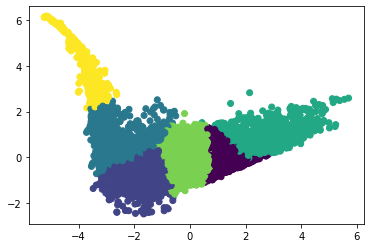

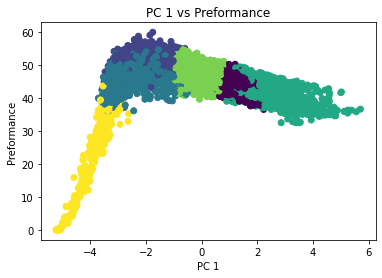

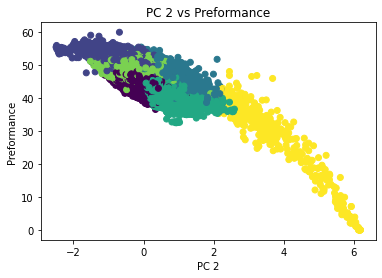

In [25]:
from sklearn.cluster import KMeans
_,_,color=make_pca_agg_fit(1,test,var,g_comp,func_give=KMeans,array_out=True)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
Out=PCA(n_components=2)
g=Out.fit(test)
a=g.transform(test)
pc1=a.T[:][0]
pc2=a.T[:][1]
plt.scatter(pc1,pc2,c=color)
plt.show()
plt.title("PC 1 vs Preformance")
plt.xlabel(f"PC 1")
plt.ylabel(f"Preformance")
plt.scatter(pc1,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()
plt.title("PC 2 vs Preformance")
plt.xlabel(f"PC 2")
plt.ylabel(f"Preformance")
plt.scatter(pc2,data['H2@100 bar/77K (g/L)'],c=color)
plt.show()